<a href="https://colab.research.google.com/github/Rupam027/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MOUNTING IMAGE FOLDER FROM DRIVE**

In [ ]:
!pip install google

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/Mini_Project/images/'

Mask  Unmask


In [ ]:
#Images Loaded at '/content/drive/MyDrive/Mini_Project/images/'

#**Importing Libraries**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import random
import sklearn

#**Image Pre-Processing and Data Normalisation**


In [ ]:
#Image loading and viewing

mask_path = '/content/drive/MyDrive/Mini_Project/images/Mask/'
image = mask_path + '00000_Mask.jpg'
img_arr = cv2.imread(image)
plt.imshow(img_arr)

NameError: ignored

In [ ]:
#Changing colour and resizing

img_size = 128   
img_arr_new = cv2.resize(img_arr,  (img_size,img_size))
img_arr_new = cv2.cvtColor(img_arr_new, cv2.COLOR_BGR2GRAY)
plt.imshow(img_arr_new)
plt.show()

In [ ]:
#Checking the image shape

img_arr_new.shape

In [ ]:
#Implementing the above blocks in modules

def mapper(string):
  if string == "Mask/":
    return 1
  else:
    return 0


def normalised(image):
  image = image / 255.0     #normalize the data
  return image

def process_image(image):
  img_size = 128     #setting resolution 

  new_image = cv2.resize(image,  (img_size,img_size))

  new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)    #Setting color  of image

  return new_image 
   
  

In [ ]:
#Loading all the images, processing them and storing in the dataset

Classes = ["Mask/","Unmask/"]

data_X,data_Y = [],[]

for category in Classes:
  mask_path = '/content/drive/MyDrive/Mini_Project/images/'+ category

  for image_name in os.listdir(mask_path):
    image = mask_path + image_name
    img_arr = cv2.imread(image)
    img_arr.shape
    img_arr = process_image(img_arr)
    img_arr = normalised(img_arr)
    data_X.append(img_arr.flatten())
    data_Y.append(mapper(category))
np.array(data_X).shape
    

In [ ]:
#Looking at the prepared datasset

data_X = np.array(data_X)
data_Y = np.array(data_Y)

In [ ]:
#Combining the features with the labels

data = np.insert(data_X,16384,data_Y,axis=1)

In [ ]:
#Shuffling the data

np.random.shuffle(data)

In [ ]:
#Data visualization

data

In [ ]:
#Saving the data for future use

np.save('/content/drive/MyDrive/Mini_Project/data',data)

#**Loading and Preparing Data**

**Loading and Preparing Data (128x128)**

In [ ]:
#Loading data for training
dataset = np.load('/content/drive/MyDrive/Mini_Project/data.npy')

In [ ]:
#looking at shape of the dataset

dataset.shape  

(1878, 16385)

In [ ]:
#Unpacking into X , y

data_X , data_Y = dataset[:,:16384] ,dataset[: , 16384]           

In [ ]:
#Splitting the dataset into training and testing set

from sklearn.model_selection import train_test_split 

train_X , test_X , train_Y , test_Y = train_test_split(data_X , data_Y , test_size = 0.20 ,  shuffle=False , random_state=42)

In [ ]:
#Checking their shapes

print(train_X.shape , train_Y.shape , test_X.shape , test_Y.shape)         

(1502, 16384) (1502,) (376, 16384) (376,)


In [ ]:
#Viewing Images
#Tune this variable to traverse the training data (0 -> 92)  


orient  = 2

p = 16 * orient
for pos in range(16):
  plt.subplot(4 , 4 , (pos+1))
  plt.imshow(train_X[(pos+p)].reshape(128 , 128))
  plt.axis("off")
  plt.title(str(train_Y[(pos+p)]))
  



**Loading and Preparing Data (224x224x3)**


In [ ]:
#Data Loading
data_X = np.load('/content/drive/MyDrive/Mini_Project/data_1_X.npy')
data_Y = np.load('/content/drive/MyDrive/Mini_Project/data_1_Y.npy')

In [ ]:
#Splitting the dataset into training and testing set

from sklearn.model_selection import train_test_split 

train_X , test_X , train_Y , test_Y = train_test_split(data_X , data_Y , test_size = 0.20 ,  shuffle=True , random_state=42)


In [ ]:
#Removing of redundent variable

del data_X ,data_Y

#**Model Building**

**Model Name, Train Accuracy, Test Accuracy**  


*   Model_0 -----> Test Accuracy= 0.86
*   Model_1 -----> Test Accuracy= 0.97
*   Model_2 -----> Test Accuracy= 0.99
*   Model_3 -----> Test Accuracy= 0.84

**Building of Model_0**

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (16384, )))
model.add(tf.keras.layers.Dense( 10000, activation='relu'))
model.add(tf.keras.layers.Dense( 5000,  activation='relu'))
model.add(tf.keras.layers.Dense( 1000,  activation='relu'))
model.add(tf.keras.layers.Dense( 500,  activation='relu'))
model.add(tf.keras.layers.Dense( 100,  activation='relu'))
model.add(tf.keras.layers.Dense( 25,  activation='relu'))
model.add(tf.keras.layers.Dense( 10,  activation='relu'))
model.add(tf.keras.layers.Dense( 5,  activation='relu'))
model.add(tf.keras.layers.Dense(1,    activation ='sigmoid'))

In [ ]:
model.summary()

In [ ]:
#Compilation of model

model.compile(optimizer = 'Adam', loss = 'BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
#Fitting the model

history = model.fit(train_X, train_Y, batch_size=100, epochs= 50 , validation_split=0.2, verbose='auto' )

In [ ]:
#Evaluating the model

model.evaluate(test_X, test_Y )


12/12 [==============================] - 4s 297ms/step - loss: 0.4165 - accuracy: 0.8298


[0.4165043830871582, 0.8297872543334961]

In [ ]:
#Saving the model

model.save('/content/drive/MyDrive/Mini_Project/models/model_0.h5')

**Building of Model_1**

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224 ,224,3),
    include_top = False
)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in range(15):
  base_model.layers[layer].trainable = False

In [ ]:
model_1 = tf.keras.Sequential()
model_1.add(base_model)
model_1.add(tf.keras.layers.GlobalAveragePooling2D())
model_1.add(tf.keras.layers.Dense( 500 ,  activation='relu'))
model_1.add(tf.keras.layers.Dense( 100,  activation='relu'))
model_1.add(tf.keras.layers.Dense( 1,   activation='sigmoid'))

In [ ]:
model_1.summary()

In [ ]:
model_1.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_X, train_Y, batch_size=100, epochs= 5 , validation_split=0.2, verbose='auto' )

In [ ]:
model_1.evaluate(test_X, test_Y )

12/12 [==============================] - 10s 774ms/step - loss: 0.2407 - accuracy: 0.9787


[0.24066828191280365, 0.978723406791687]

In [ ]:
#Saving the model

model_1.save('/content/drive/MyDrive/Mini_Project/models/model_1.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
img = test_X[250]

img.shape

(224, 224, 3)

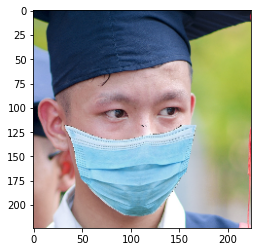

In [ ]:
plt.imshow(img)


In [ ]:
test_Y[250]

**Building of Model_2**

In [ ]:
base_model = tf.keras.applications.ResNet50V2(
    input_shape = (224 , 224 ,3) , 
    include_top=False
)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False


In [ ]:
model_2 = tf.keras.Sequential()
model_2.add(base_model)
model_2.add(tf.keras.layers.GlobalAveragePooling2D())
model_2.add(tf.keras.layers.Dense( 1000,  activation='relu'))
model_2.add(tf.keras.layers.Dense( 500,  activation='relu'))
model_2.add(tf.keras.layers.Dense( 100,  activation='relu'))
model_2.add(tf.keras.layers.Dense( 1,   activation='sigmoid'))


In [ ]:
model_2.summary()

In [ ]:
model_2.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_X, train_Y, batch_size=100, epochs= 5 , validation_split=0.2, verbose='auto' )

In [ ]:
model_2.evaluate(test_X, test_Y )

In [ ]:
#Saving the model

model_2.save('/content/drive/MyDrive/Mini_Project/models/model_2.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


**Building of Model_3** 

In [ ]:
base_model = tf.keras.applications.NASNetMobile(
    input_shape=(224, 224, 3),
    include_top=False
)

19996672/19993432 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False
  #base_model.layers[layer].trainable = False


In [ ]:
model_3 = tf.keras.Sequential()
model_3.add(base_model)
model_3.add(tf.keras.layers.GlobalAveragePooling2D())
model_3.add(tf.keras.layers.Dense(500, activation = 'relu'))
model_3.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_3.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) 

In [ ]:
model_3.summary()

In [ ]:
model_3.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_X, train_Y, batch_size=100, epochs= 15 , validation_split=0.2, verbose='auto' )

In [ ]:
model_3.evaluate(test_X, test_Y )

In [ ]:
#Saving the model

model_3.save('/content/drive/MyDrive/Mini_Project/models/model_3.h5')

#**Loading and Evaluating the model**

In [ ]:
from tensorflow.keras import models


In [ ]:
model_0 = models.load_model('/content/drive/MyDrive/Mini_Project/models/model_0.h5')

In [ ]:
model_1 = models.load_model('/content/drive/MyDrive/Mini_Project/models/model_1.h5')

In [ ]:
model_2 = models.load_model('/content/drive/MyDrive/Mini_Project/models/model_2.h5')

In [ ]:
model_3 = models.load_model('/content/drive/MyDrive/Mini_Project/models/model_3.h5')

In [ ]:
prediction = model_1.predict(test_X)

In [ ]:
def decode_pred(prob):
  if prob > 0.5 :
    return 1
  else:
    return 0

decoded = [decode_pred(pred)   for pred in prediction]

Predicted =  1    [1.]


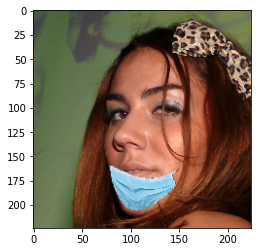

Predicted =  1    [0.9999786]


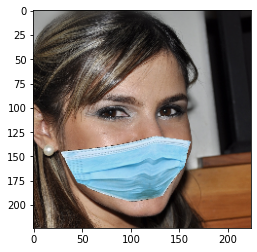

Predicted =  0    [0.29197752]


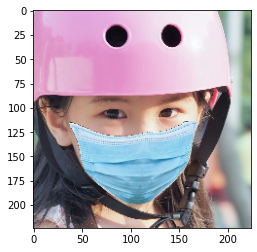

Predicted =  0    [1.4546132e-05]


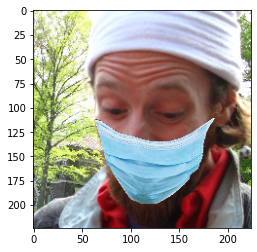

Predicted =  1    [0.99999976]


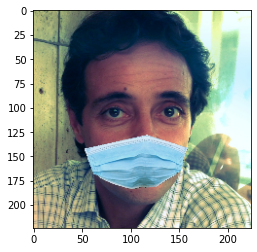

Predicted =  1    [0.7800085]


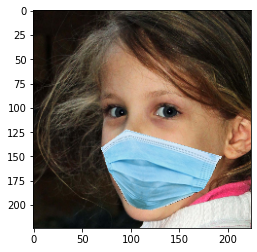

Predicted =  1    [1.]


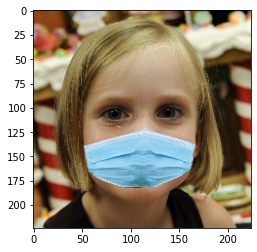

Predicted =  1    [0.7119206]


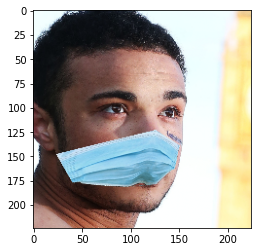

Count of Wrong  8


In [ ]:
count = 0
for pos in range(len(test_Y)):
  if test_Y[pos] != decoded[pos]:
    print("Predicted = " , decoded[pos] , "  " ,prediction[pos])
    count += 1

    plt.imshow(test_X[pos]) 
    plt.show()

print("Count of Wrong " , count)
    


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(test_Y, decoded, average = 'binary')
f1

0.8647214854111405

In [ ]:
help(sklearn.metrics.f1_score)

#**Visualizing the Model** 

In [ ]:
from tensorflow.keras import models , utils  


In [ ]:
model_0 = models.load_model('/content/drive/MyDrive/Mini_Project/models/model_0.h5')

In [ ]:
model_1 = models.load_model('/content/drive/MyDrive/Mini_Project/models/model_1.h5')

In [ ]:
model_2 = models.load_model('/content/drive/MyDrive/Mini_Project/models/model_2.h5')

In [ ]:
model_3 = models.load_model('/content/drive/MyDrive/Mini_Project/models/model_3.h5')

In [ ]:
utils.plot_model(model_0 , to_file='/content/drive/MyDrive/Mini_Project/model_images/model_0.png')
utils.plot_model(model_1 , to_file='/content/drive/MyDrive/Mini_Project/model_images/model_1.png')
utils.plot_model(model_2 , to_file='/content/drive/MyDrive/Mini_Project/model_images/model_2.png')
utils.plot_model(model_3 , to_file='/content/drive/MyDrive/Mini_Project/model_images/model_3.png')

# **TESTING ON LIVE IMAGES**